# Amazon Prime Video - Movies and TV Shows
## Data Cleaning and Exploratory Data Anlysis (EDA)

AUTHOR: Sehaj Malhotra - https://www.linkedin.com/in/sehajmalhotra/





Dataset link - https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('amazon_prime_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [4]:
data.drop(['show_id'], axis = 1, inplace = True)
data.drop(['description'], axis = 1, inplace = True)

In [5]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy"


In [6]:
#Checking for duplicate
data.duplicated().sum()

0

In [7]:
data.describe()

,release_year
count,9668.000000
mean,2008.341849
std,18.922482
min,1920.000000
25%,2007.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7586 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
dtypes: int64(1), object(9)
memory usage: 755.4+ KB


In [9]:
data.isna().sum()

type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
dtype: int64

In [10]:
#Filling the null values
data['director'].fillna('Uavailable', inplace = True)
data['cast'].fillna('Uavailable', inplace = True)
data['country'].fillna('Uavailable', inplace = True)
data['date_added'] = data['date_added'].ffill()
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [11]:
data.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [12]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy"


In [13]:
data['date_added'] = pd.to_datetime(data['date_added'], format = '%B %d, %Y')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   object        
 1   title         9668 non-null   object        
 2   director      9668 non-null   object        
 3   cast          9668 non-null   object        
 4   country       9668 non-null   object        
 5   date_added    9668 non-null   datetime64[ns]
 6   release_year  9668 non-null   int64         
 7   rating        9668 non-null   object        
 8   duration      9668 non-null   object        
 9   listed_in     9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 755.4+ KB


In [15]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,2014,13+,113 min,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,2018,13+,110 min,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,2021-03-30,2017,13+,74 min,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,2021-03-30,2014,13+,69 min,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,2021-03-30,1989,13+,45 min,"Drama, Fantasy"


In [16]:
#top 10 diretors with most directed movies
filtered_directors = data[data['director'] != 'Uavailable']
top_directors = filtered_directors['director'].value_counts().head(10)

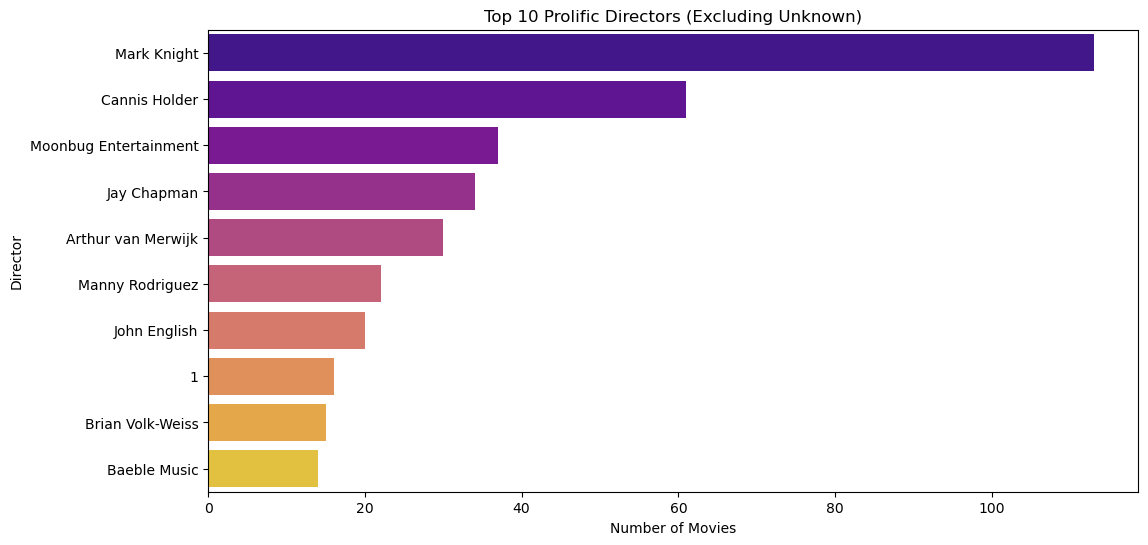

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title('Top 10 Prolific Directors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

In [18]:
filtered_actors = data[data['cast'] != 'Uavailable']
top_actors = filtered_actors['cast'].value_counts().head(10)

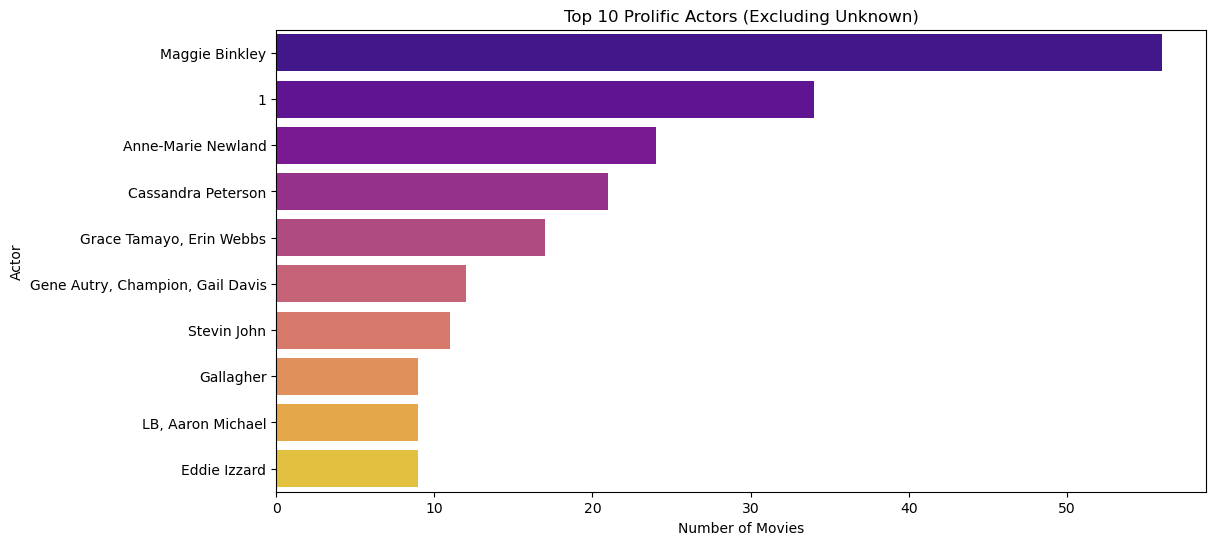

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='plasma')
plt.title('Top 10 Prolific Actors (Excluding Unknown)')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

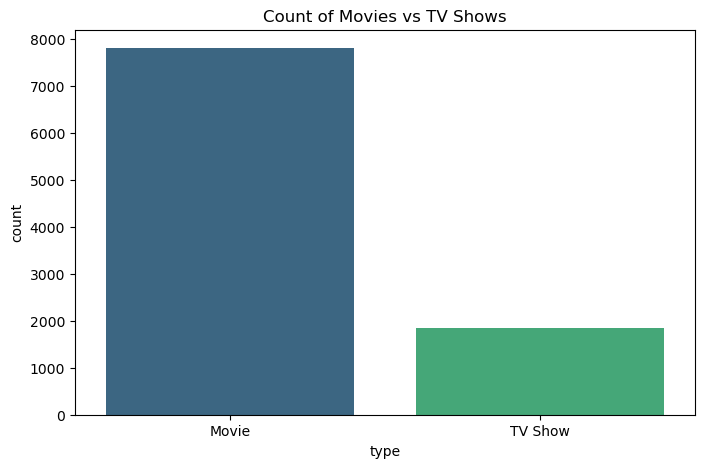

In [20]:
# Count of each content type (Movie vs. TV Show)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='type', palette='viridis')
plt.title('Count of Movies vs TV Shows')
plt.show()

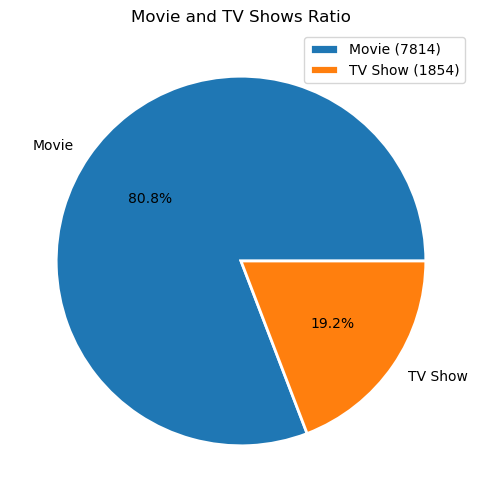

In [21]:
df_pie = data['type'].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    x=df_pie.values,labels=df_pie.index,autopct='%.1f%%',
    wedgeprops={'linewidth':2.0,'edgecolor':'white'}
    )
plt.title('Movie and TV Shows Ratio')
plt.legend(labels=[f"{label} ({count})" for label, count in zip(df_pie.index, df_pie.values)],loc='best')
plt.show()

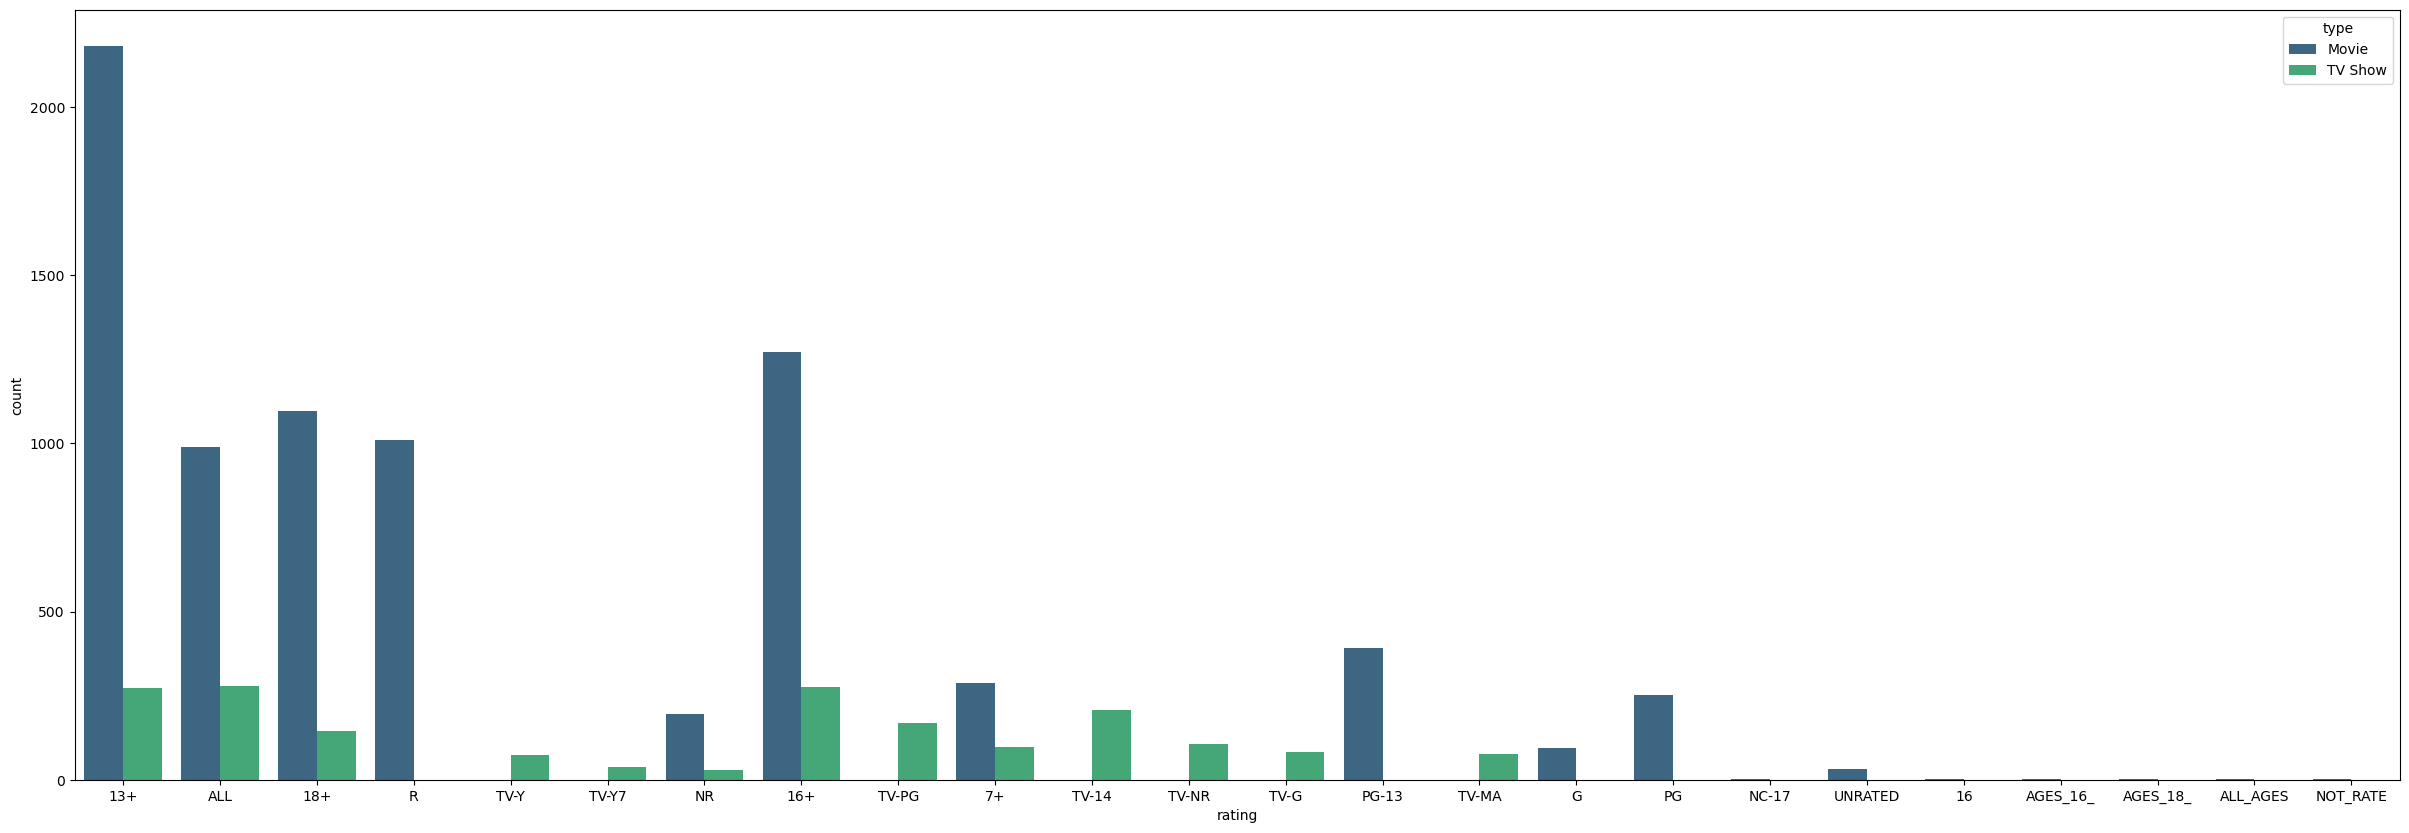

In [22]:
plt.figure(figsize=(30,10))
r = sns.countplot(x= data['rating'],data=data,hue = 'type',palette='viridis')

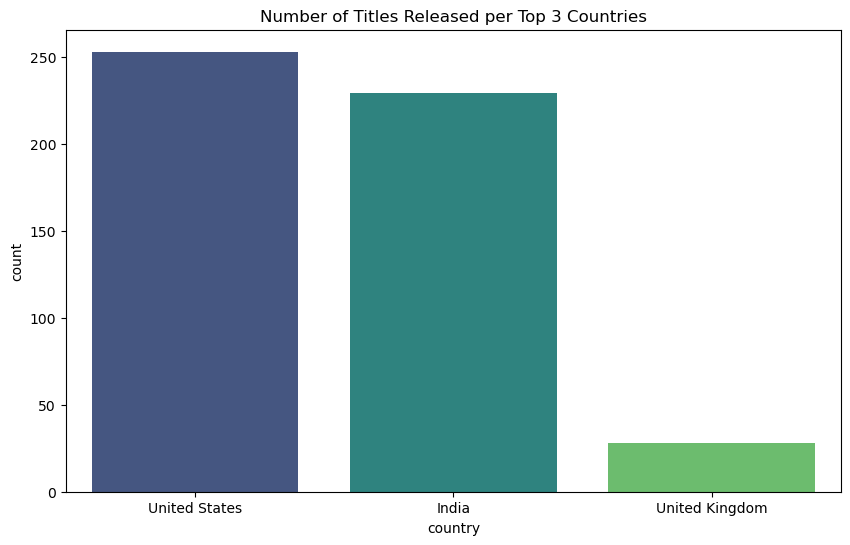

In [23]:
# Calculating the number of titles per country
filtered_country = data[data['country'] != 'Uavailable']
country_counts = filtered_country['country'].value_counts()

# Getting the top 3 countries
top_countries = country_counts.nlargest(3).index

# Filtering the DataFrame to include only the top 3 countries
df_top_countries = filtered_country[filtered_country['country'].isin(top_countries)]

# Plotting the number of titles released per top 3 countries
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_countries, x='country', palette='viridis', order=top_countries)
plt.title('Number of Titles Released per Top 3 Countries')
plt.show()

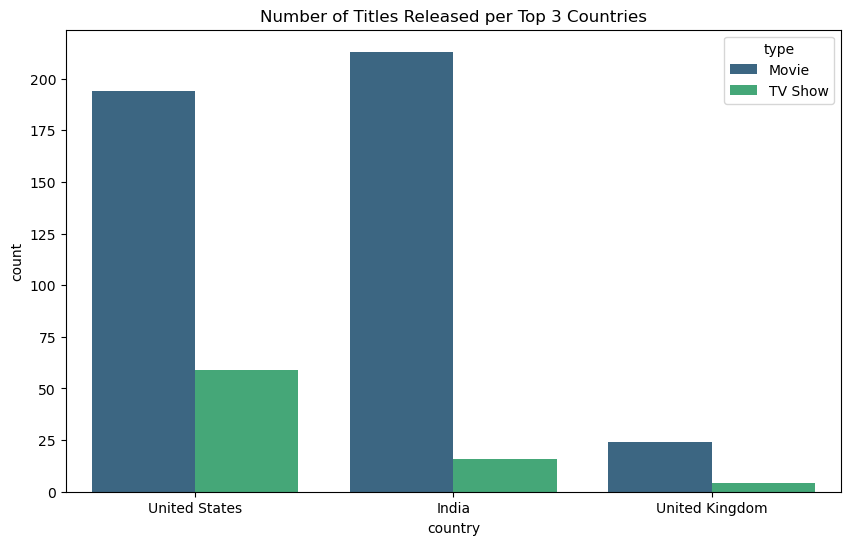

In [24]:
# Calculating the number of titles per country
filtered_country = data[data['country'] != 'Uavailable']
country_counts = filtered_country['country'].value_counts()

# Getting the top 3 countries
top_countries = country_counts.nlargest(3).index

# Filtering the DataFrame to include only the top 3 countries
df_top_countries = filtered_country[filtered_country['country'].isin(top_countries)]

# Plotting the number of titles released per top 3 countries
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_countries, x='country', hue = 'type', palette='viridis', order=top_countries)
plt.title('Number of Titles Released per Top 3 Countries')
plt.show()

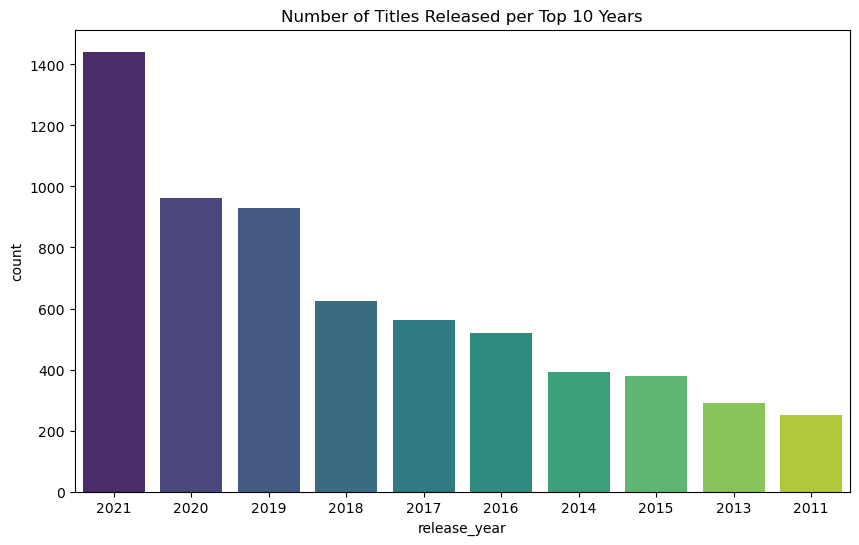

In [25]:
year_counts = data['release_year'].value_counts()

# Getting the top 10 release-year
top_years = year_counts.nlargest(10).index

# Filtering the DataFrame to include only the top 10 Years
df_top_years = data[data['release_year'].isin(top_years)]

# Plotting the number of titles released per top 10 Years
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_years, x='release_year', palette='viridis', order=top_years)
plt.title('Number of Titles Released per Top 10 Years')
plt.show()

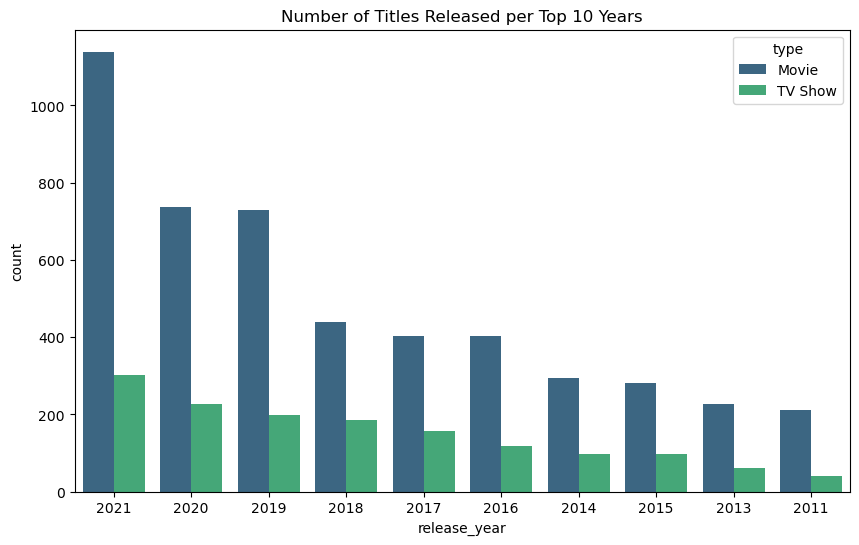

In [26]:
year_counts = data['release_year'].value_counts()

# Getting the top 10 release-year
top_years = year_counts.nlargest(10).index

# Filtering the DataFrame to include only the top 10 Years
df_top_years = data[data['release_year'].isin(top_years)]

# Plotting the number of titles released per top 10 Years
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_years, x='release_year', hue = 'type', palette='viridis', order=top_years)
plt.title('Number of Titles Released per Top 10 Years')
plt.show()

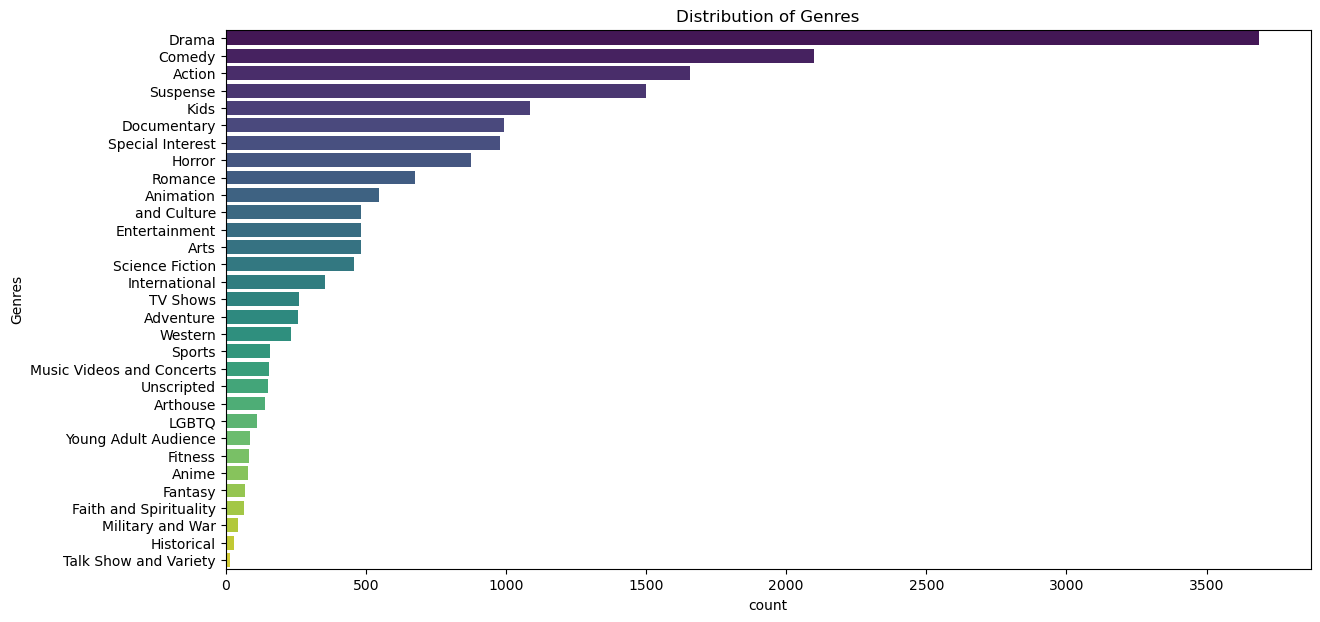

In [27]:
# Distribution of genres
# Splitting the genres
data['Genres'] = data['listed_in'].apply(lambda x: x.split(', '))

# Exploding the genres into separate rows
genres_exploded = data.explode('Genres')

plt.figure(figsize=(14, 7))
sns.countplot(data=genres_exploded, y='Genres', order=genres_exploded['Genres'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres')
plt.show()

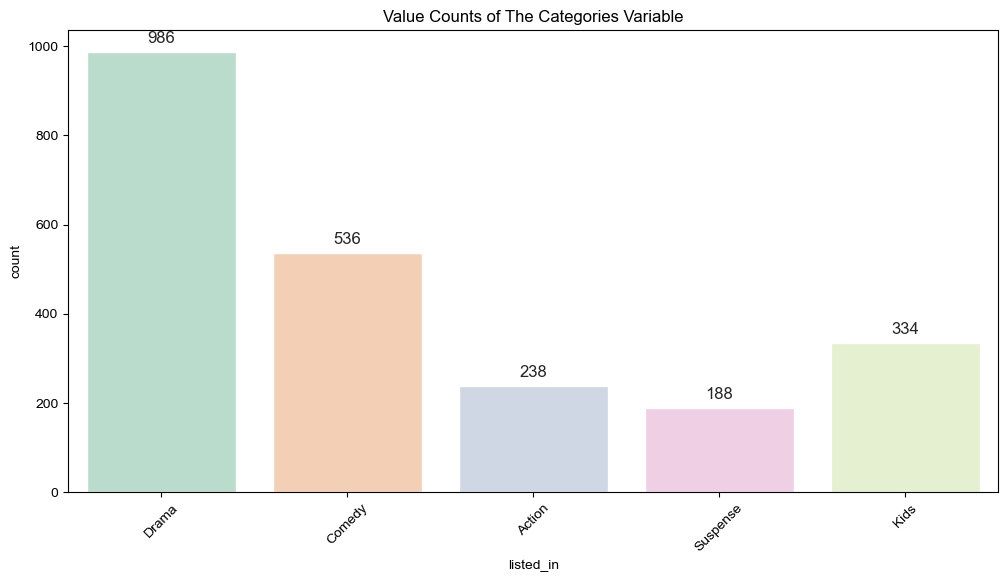

In [28]:
data['Genres'] = data['listed_in'].apply(lambda x: x.split(', '))
genres_exploded = data.explode('Genres')

plt.figure(figsize=(12, 6))
plt.title("Value Counts of The Categories Variable")
sns.set(style="darkgrid")
ax = sns.countplot(x="listed_in", data=genres_exploded, palette="Pastel2",
                   order=genres_exploded['Genres'].value_counts().iloc[:5].index)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

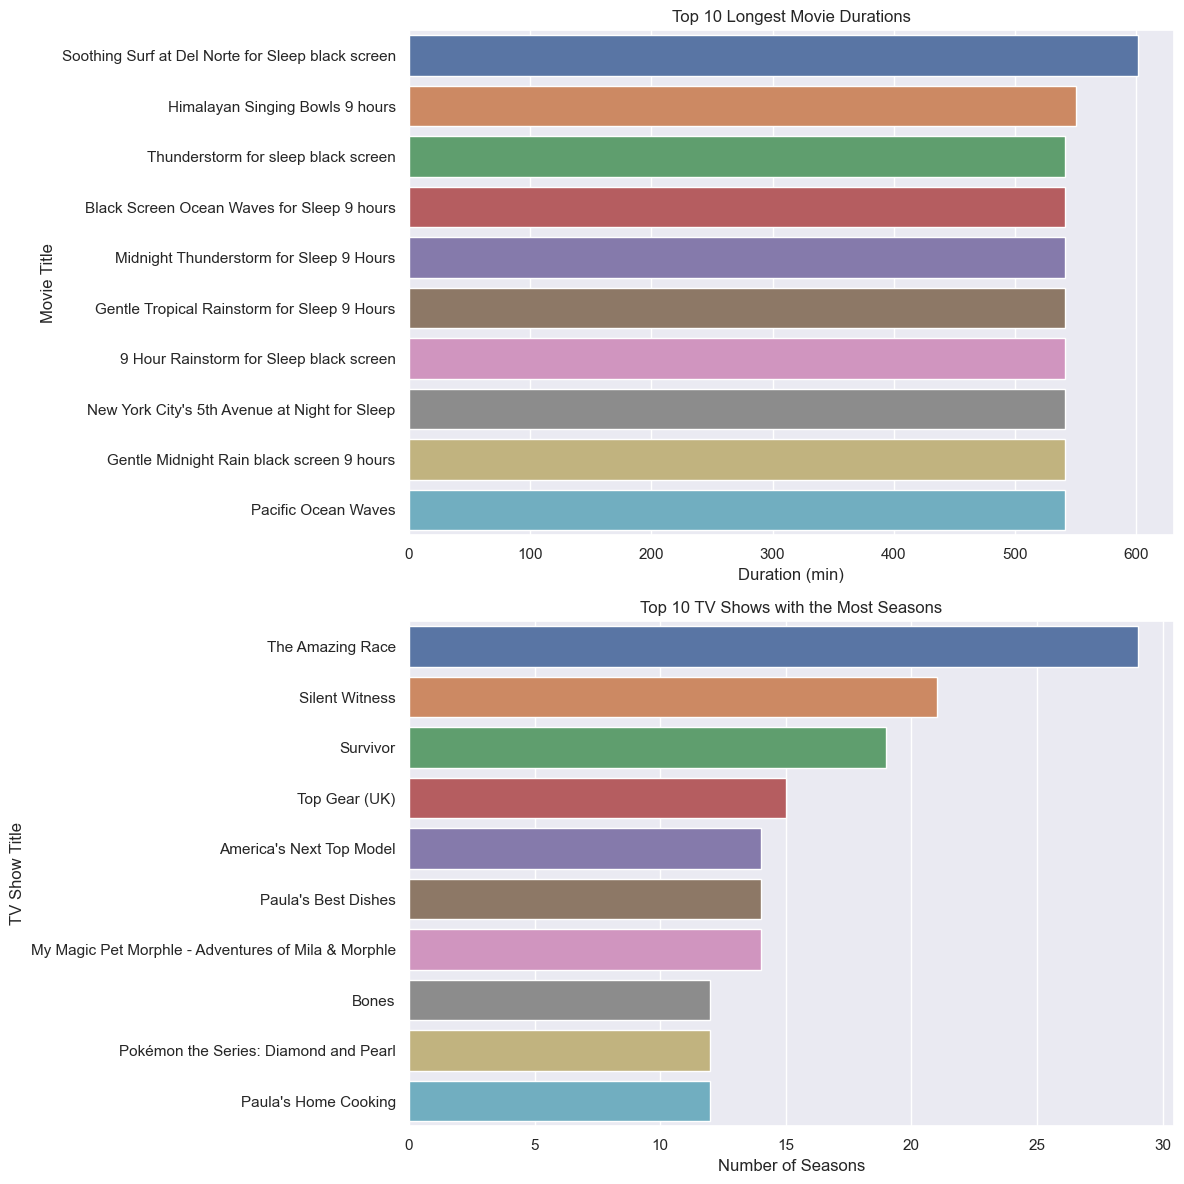

In [29]:
# Filter data for movies and TV shows separately
df_movies = data[data['type'] == 'Movie'].copy()
df_tv_shows = data[data['type'] == 'TV Show'].copy()

# Extract numeric duration for movies
df_movies['duration_num'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(float)

# Extract numeric duration for TV shows
df_tv_shows['duration_num'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(float)

# Plotting
plt.figure(figsize=(12, 12))

# Subplot 1: Top 10 Longest Movie Duration
plt.subplot(2, 1, 1)
sns.barplot(data=df_movies.sort_values(by='duration_num', ascending=False).head(10), y='title', x='duration_num', orient='horizontal')
plt.title('Top 10 Longest Movie Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Movie Title')

# Subplot 2: Top 10 TV Shows with the Most Seasons
plt.subplot(2, 1, 2)
sns.barplot(data=df_tv_shows.sort_values(by='duration_num', ascending=False).head(10), y='title', x='duration_num', orient='horizontal')
plt.title('Top 10 TV Shows with the Most Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('TV Show Title')

plt.tight_layout()
plt.show()

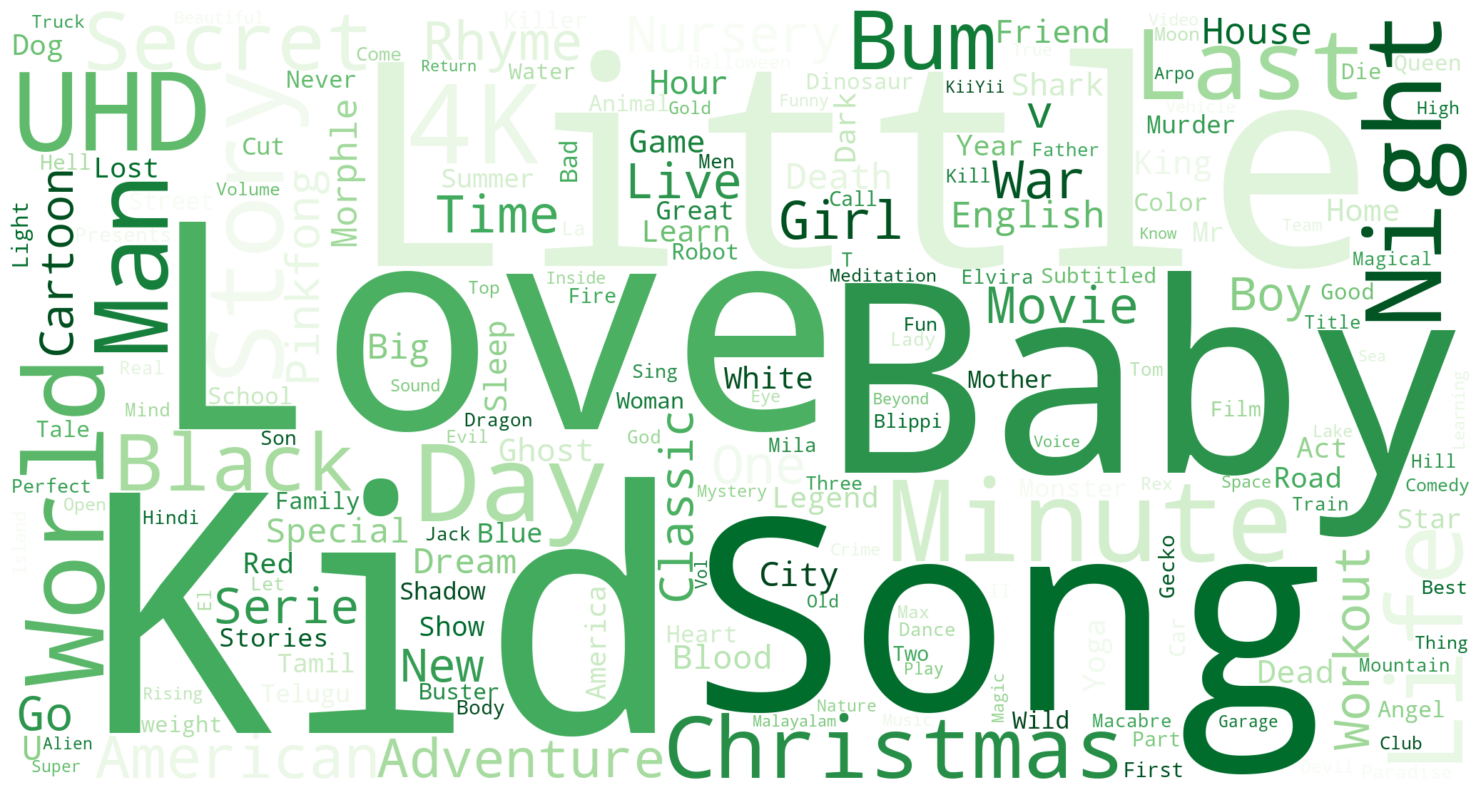

In [30]:
txt1 = " ".join(title for title in data.title)

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='Greens_r').generate(txt1)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

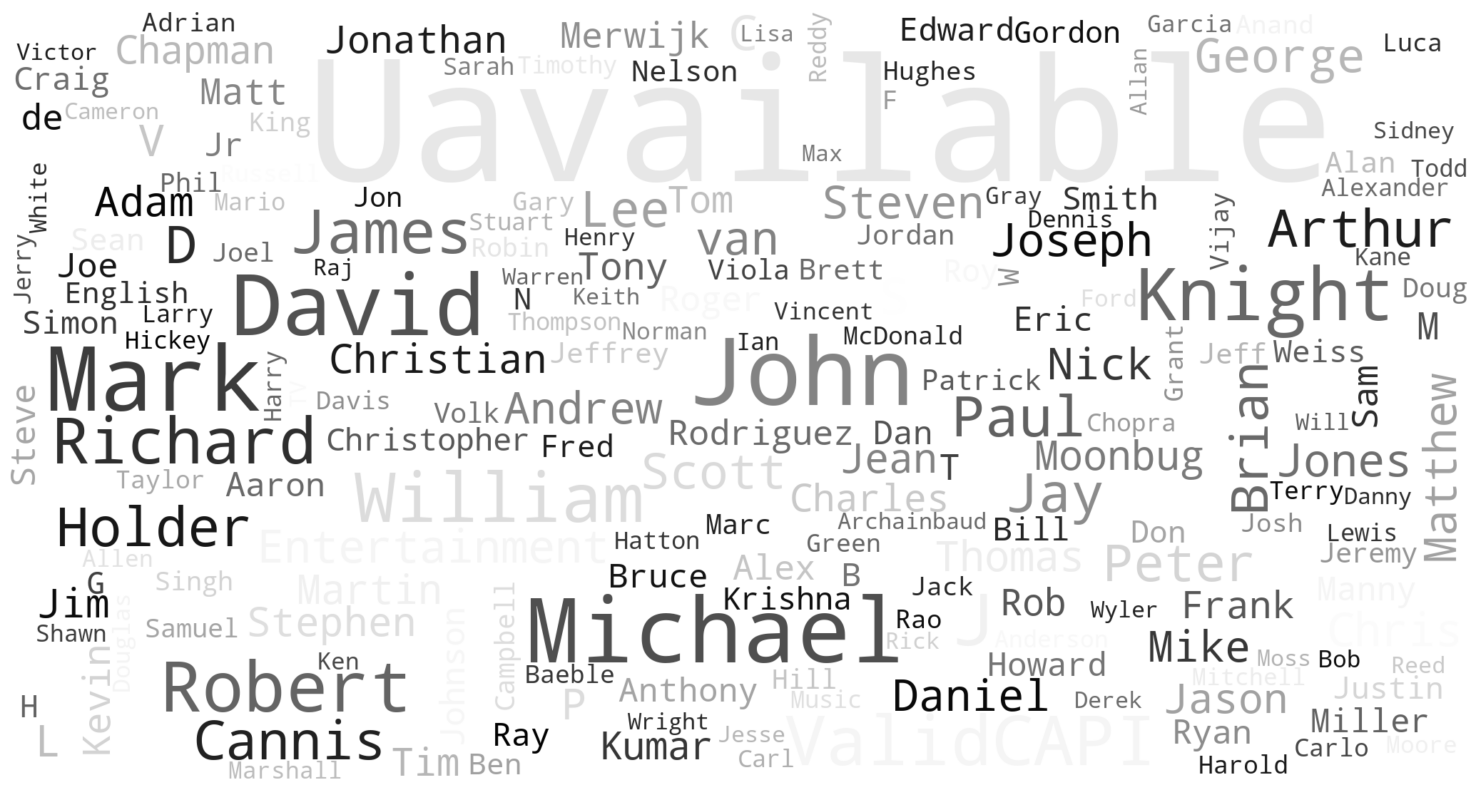

In [31]:
txt2 = " ".join(director for director in data.director)

word_cloud2 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='gist_gray').generate(txt2)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

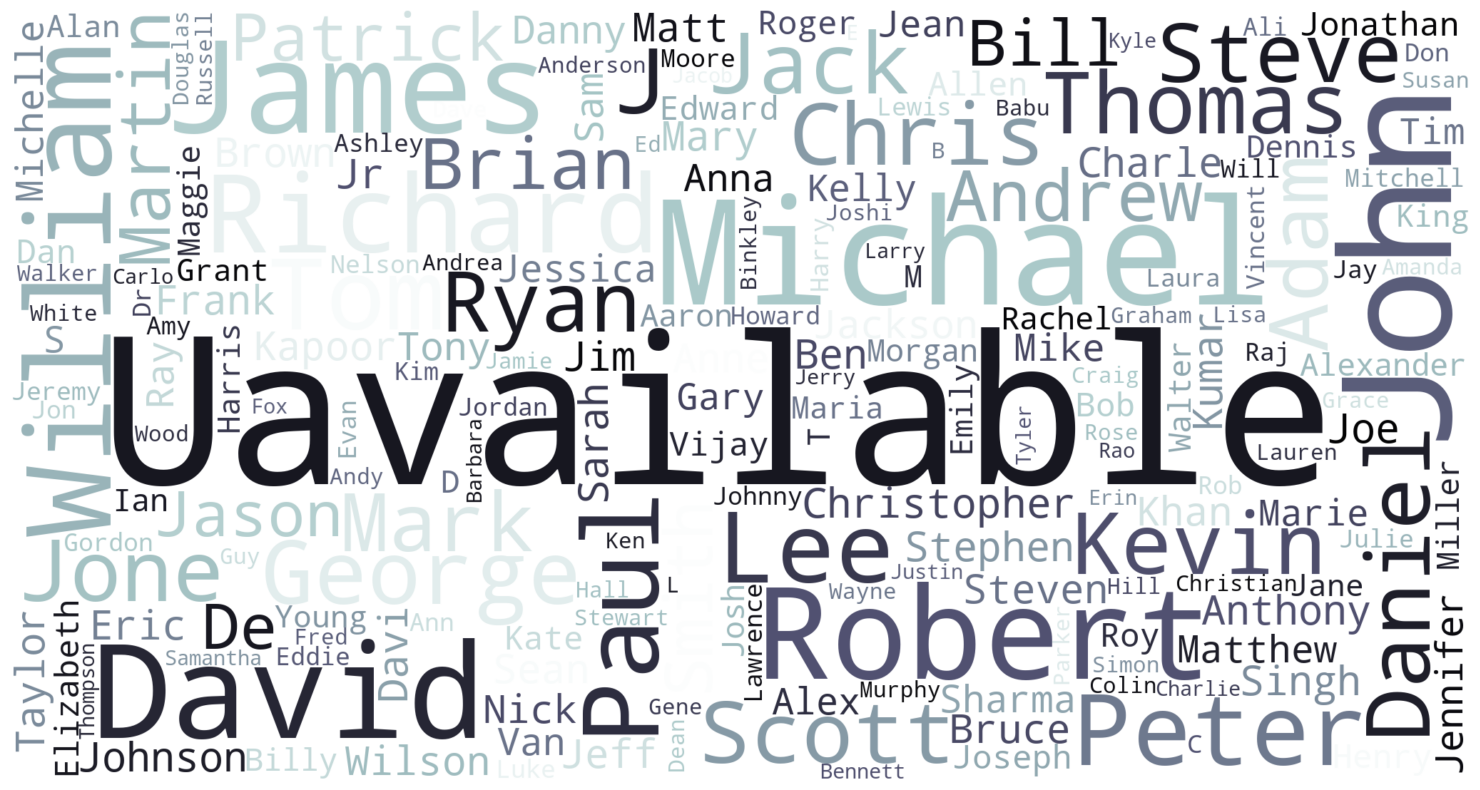

In [32]:
txt3 = " ".join(cast for cast in data.cast)

word_cloud3 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080,colormap='bone_r').generate(txt3)

plt.figure(figsize=(30,10))
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()